# Practical session 2 - Practise with classic libraries

Students (pair):
- [Hugo Jouan]([link](https://github.com/hugojou))
- [Ilan Sarfati]([link](https://github.com/IlanS19))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [36]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le nombre aléatoire pour la reproductibilité, on teste la reproductibilité avec la fonction random.rand

np.random.seed(42)
random_numbers = np.random.rand(5)
print(random_numbers)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [38]:
np.random.seed(42)
random_numbers = np.random.rand(5)
print(random_numbers)

#on a bien vérifié la reproductibilité 

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [39]:
np.random.seed(42)

# Paramètres de la distribution Gamma
alpha = 9  # Paramètre alpha (forme)
beta = 2   # Paramètre beta (échelle)

# Générer des échantillons (10^5) de la distribution Gamma
num_samples = int(1e5)
samples = np.random.gamma(alpha, 1/beta, num_samples)

# Sauvegarder les échantillons dans un fichier .npy
np.save("samples.npy", samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

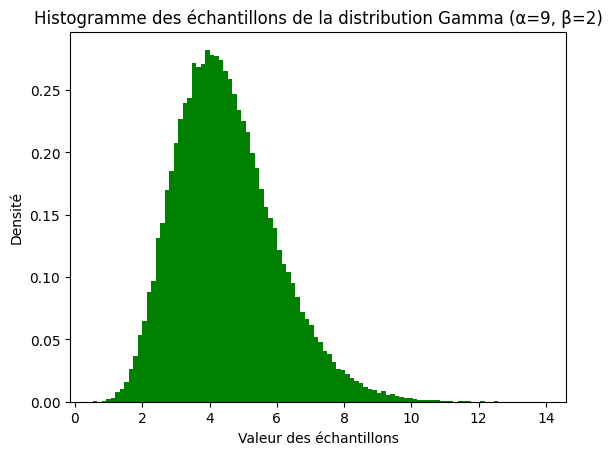

In [40]:
# Charger les échantillons à partir du fichier .npy 
samples = np.load("samples.npy")

# l'histogramme de la distribution
# Utiliser 100 bins pour une courbe assez lisse
bins = 100
plt.hist(samples, bins=bins, density=True, color='green')


plt.title("Histogramme des échantillons de la distribution Gamma (α=9, β=2)")
plt.xlabel("Valeur des échantillons")
plt.ylabel("Densité")

plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

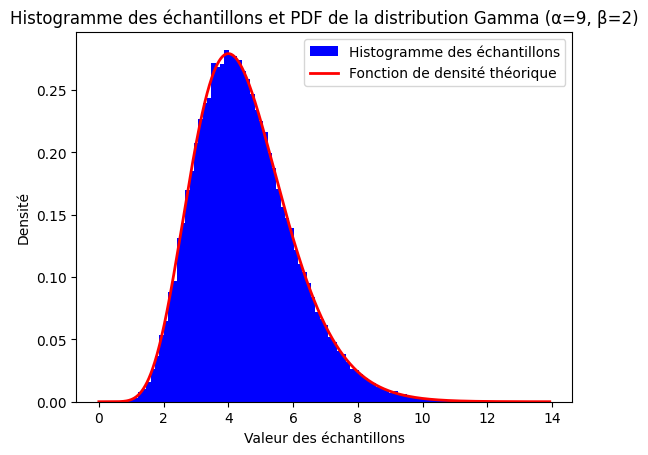

In [41]:


from scipy.stats import gamma



# Paramètres de la distribution Gamma
alpha = 9  
beta = 2   

# Tracer l'histogramme des échantillons générés
plt.hist(samples, bins=100, density=True, color='blue', label='Histogramme des échantillons')

# Générer une plage de valeurs x pour la fonction PDF
x = np.linspace(0, np.max(samples), 1000)

# Calculer la PDF théorique de la distribution Gamma
pdf = gamma.pdf(x, a=alpha, scale=1/beta)

# Superposer la courbe de la PDF théorique
plt.plot(x, pdf, 'r-', lw=2, label='Fonction de densité théorique')

# Ajouter des titres, légendes et labels
plt.title("Histogramme des échantillons et PDF de la distribution Gamma (α=9, β=2)")
plt.xlabel("Valeur des échantillons")
plt.ylabel("Densité")
plt.legend()

# Sauvegarder l'image au format .png
plt.savefig("gamma_histogram.png")

# Afficher le graphique
plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [42]:
import pandas as pd

# Lire les données depuis le fichier CSV
data = pd.read_csv('data/data.csv')

X = data['X']
Y = data['Y']

# Calculer la médiane, la moyenne, la variance et l'écart type pour X
statistics_X = {
    'Median': X.median(),
    'Mean': X.mean(),
    'Variance': X.var(),
    'Standard Deviation': X.std()
}

# Calculer la médiane, la moyenne, la variance et l'écart type pour Y

statistics_Y = {
    'Median': Y.median(),
    'Mean': Y.mean(),
    'Variance': Y.var(),
    'Standard Deviation': Y.std()
}

# Afficher les résultats

print("Statistiques pour X:")
for stat, value in statistics_X.items():
    print(f"{stat}: {value}")

print("\nStatistiques pour Y:")
for stat, value in statistics_Y.items():
    print(f"{stat}: {value}")

Statistiques pour X:
Median: 180.5
Mean: 153.75
Variance: 3486.0227272727275
Standard Deviation: 59.04255014201815

Statistiques pour Y:
Median: 24.0
Mean: 25.916666666666668
Variance: 42.4469696969697
Standard Deviation: 6.5151338970868204


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [43]:
#Conversion des dataframes pandas en array numpy
X = data['X'].to_numpy()
Y = data['Y'].to_numpy()

# Calculer les coefficients de la régression linéaire
coefficients = np.polyfit(X, Y, 1)  # 1 pour une droite (degré 1)

# Extraire la pente (a) et l'ordonnée à l'origine (b)
a, b = coefficients

# Afficher l'équation de la droite de régression
print(f"L'équation de la droite de régression est : Y = {a:.4f} * X + {b:.4f}")

L'équation de la droite de régression est : Y = -0.0982 * X + 41.0095


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

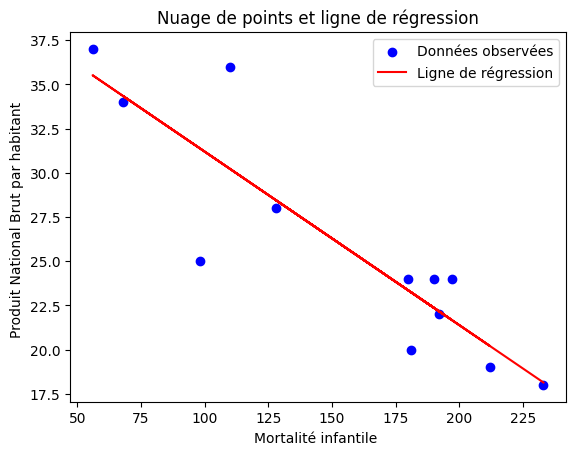

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a, b = coefficients

# Créer des valeurs prédites pour la régression
Y_pred = np.polyval(coefficients, X)

# Tracer le nuage de points
plt.scatter(X, Y, color='blue', label='Données observées')

# Tracer la ligne de régression
plt.plot(X, Y_pred, color='red', label='Ligne de régression')

# Ajouter des titres et des labels
plt.title("Nuage de points et ligne de régression")
plt.xlabel("Mortalité infantile ")
plt.ylabel("Produit National Brut par habitant ")
plt.legend()

# Sauvegarder l'image au format .png
plt.savefig("regression_plot.png")

# Afficher le graphique
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [45]:
import numpy as np

def gradient2D(X):
    # Ensure that X is a 2D array
    if X.ndim != 2:
        raise ValueError("Input matrix must be 2D.")
    
    # Compute horizontal differences (X[:, n+1] - X[:, n])
    D_h = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]  # Append zeros column

    # Compute vertical differences (X[m+1, :] - X[m, :])
    D_v = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]  # Append zeros row

    return D_h, D_v


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [46]:
def test_output_format():
    """Test que la sortie de gradient2D a la même taille que l'entrée."""
    X = np.random.rand(4, 5)  # Matrice aléatoire non carrée
    D_h, D_v = gradient2D(X)
    assert D_h.shape == X.shape, "La forme du gradient horizontal est incorrecte."
    assert D_v.shape == X.shape, "La forme du gradient vertical est incorrecte."
    print("Test test_output_format: PASS")

# Test: Matrice constante carrée
def test_constant_matrix_square():
    """Test que gradient2D renvoie des matrices de zéros pour une matrice carrée constante."""
    X = np.ones((3, 3))  # Matrice constante carrée
    D_h, D_v = gradient2D(X)
    assert np.all(D_h == 0), "Le gradient horizontal doit être nul pour une matrice constante."
    assert np.all(D_v == 0), "Le gradient vertical doit être nul pour une matrice constante."
    print("Test test_constant_matrix_square: PASS")

# Test: Matrice constante non carrée
def test_constant_matrix_non_square():
    """Test que gradient2D renvoie des matrices de zéros pour une matrice non carrée constante."""
    X = np.ones((4, 5))  # Matrice constante non carrée
    D_h, D_v = gradient2D(X)
    assert np.all(D_h == 0), "Le gradient horizontal doit être nul pour une matrice constante."
    assert np.all(D_v == 0), "Le gradient vertical doit être nul pour une matrice constante."
    print("Test test_constant_matrix_non_square: PASS")

test_output_format()
test_constant_matrix_square()
test_constant_matrix_non_square()

Test test_output_format: PASS
Test test_constant_matrix_square: PASS
Test test_constant_matrix_non_square: PASS


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [47]:
# Already commented on Question 1

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [48]:
import numpy as np

def tv(X):
    """
    Computes the isotropic total variation (TV) of a given matrix X.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Input matrix of shape (M, N), where M is the number of rows and N is the number of columns.
    
    Returns:
    --------
    float
        The isotropic total variation of the matrix X.
    
    Raises:
    -------
    ValueError
        If the input matrix X has more than 2 dimensions.
    """
    # Compute the horizontal and vertical gradients using the previously defined gradient2D function
    D_h, D_v = gradient2D(X)
    
    # Compute the total variation by summing the isotropic norm (sqrt of the sum of squares)
    return np.sum(np.sqrt(D_h**2 + D_v**2))



    #Unit Test : 
    # Test cases for the tv function
def test_tv_constant_matrix():
    """Test that TV of a constant matrix is zero."""
    X = np.ones((4, 5))  # Constant matrix
    result = tv(X)
    assert result == 0, "TV of a constant matrix should be 0."
    print("Test test_tv_constant_matrix: PASS")

def test_tv_simple_difference():
    """Test that TV is correctly computed for a matrix with a single difference."""
    X = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])  # A small variation
    result = tv(X)
    expected_result = 2+np.sqrt(2)  # Because there are two non-zero gradients (in vertical and horizontal directions)
    assert np.isclose(result, expected_result), f"Expected TV to be {expected_result}, but got {result}."
    print("Test test_tv_simple_difference: PASS")

def test_tv_square_matrix():
    """Test TV for a square matrix."""
    X = np.array([[0, 1], [1, 0]])  # Simple square matrix with some differences
    result = tv(X)
    expected_result = 2+np.sqrt(2)  # TV should be 4 due to multiple edges
    assert np.isclose(result, expected_result), f"Expected TV to be {expected_result}, but got {result}."
    print("Test test_tv_square_matrix: PASS")

def test_tv_invalid_input():
    """Test that TV raises an error for invalid input."""
    X = np.ones((3, 3, 3))  # Invalid 3D input
    try:
        tv(X)
    except ValueError:
        print("Test test_tv_invalid_input: PASS")
    else:
        print("Test test_tv_invalid_input: FAIL")

# Run the unit tests
test_tv_constant_matrix()
test_tv_simple_difference()
test_tv_square_matrix()
test_tv_invalid_input()



Test test_tv_constant_matrix: PASS
Test test_tv_simple_difference: PASS
Test test_tv_square_matrix: PASS
Test test_tv_invalid_input: PASS


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [49]:
import numpy as np

def gradient2D_adjoint(Y_h, Y_v):
    """
    Compute the adjoint of the 2D discrete gradient operator D.
    
    Parameters:
    Y_h (numpy.ndarray): Horizontal gradient component of shape (M, N).
    Y_v (numpy.ndarray): Vertical gradient component of shape (M, N).
    
    Returns:
    numpy.ndarray: The adjoint D^* of the gradient operator applied to (Y_h, Y_v).
    """
    
    # Dimensions of the input gradient matrices
    M, N = Y_h.shape
    
    # Adjoint of the horizontal gradient D_h*
    adj_h = np.zeros((M, N), dtype=Y_h.dtype)
    adj_h[:, 0] = -Y_h[:, 0]  # First column
    adj_h[:, 1:N-1] = -(Y_h[:, 1:N-1] - Y_h[:, 0:N-2])  # Middle columns
    adj_h[:, N-1] = Y_h[:, N-2]  # Last column
    
    # Adjoint of the vertical gradient D_v*
    adj_v = np.zeros((M, N), dtype=Y_v.dtype)
    adj_v[0, :] = -Y_v[0, :]  # First row
    adj_v[1:M-1, :] = -(Y_v[1:M-1, :] - Y_v[0:M-2, :])  # Middle rows
    adj_v[M-1, :] = Y_v[M-2, :]  # Last row
    
    # Combine adjoint contributions from horizontal and vertical components
    return adj_h + adj_v


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [50]:
import numpy as np

def inner_product_2D(A, B):
    """
    Compute the inner product <A, B> for matrices A, B in C^{M x N}.
    This corresponds to Tr(A^H B) = sum(A^* B), where * denotes the conjugate transpose.
    
    Parameters:
    A, B (numpy.ndarray): Input matrices of shape (M, N).
    
    Returns:
    float: The inner product <A, B>.
    """
    return np.sum(np.conj(A) * B)

def inner_product_gradient(U_h, U_v, V_h, V_v):
    """
    Compute the inner product <(U_h, U_v), (V_h, V_v)> for gradient-like structures
    in C^{M x N} x C^{M x N}.
    
    Parameters:
    U_h, U_v (numpy.ndarray): Horizontal and vertical components of the first gradient.
    V_h, V_v (numpy.ndarray): Horizontal and vertical components of the second gradient.
    
    Returns:
    float: The inner product <(U_h, U_v), (V_h, V_v)>.
    """
    return inner_product_2D(U_h, V_h) + inner_product_2D(U_v, V_v)

def test_gradient2D_adjoint():
    """
    Test if the adjoint gradient2D_adjoint is indeed the adjoint of gradient2D.
    """
    np.random.seed(0)  # Set seed for reproducibility
    
    # Create random complex matrices X and (Y_h, Y_v)
    M, N = 4, 4
    X = np.random.randn(M, N) + 1j * np.random.randn(M, N)
    Y_h = np.random.randn(M, N) + 1j * np.random.randn(M, N)
    Y_v = np.random.randn(M, N) + 1j * np.random.randn(M, N)
    
    # Compute D(X) = (D_h(X), D_v(X))
    D_h, D_v = gradient2D(X)
    
    # Compute D*(Y) = gradient2D_adjoint(Y_h, Y_v)
    adj_D_Y = gradient2D_adjoint(Y_h, Y_v)
    
    # Compute <D(X), Y> = <(D_h(X), D_v(X)), (Y_h, Y_v)>
    lhs = inner_product_gradient(D_h, D_v, Y_h, Y_v)
    
    # Compute <X, D*(Y)>
    rhs = inner_product_2D(X, adj_D_Y)
    
    # Print the results for comparison
    print(f"<D(X), Y> = {lhs}")
    print(f"<X, D*(Y)> = {rhs}")
    
    # Check if both are (approximately) equal
    assert np.allclose(lhs, rhs), "The adjoint test failed! <D(X), Y> != <X, D*(Y)>"
    print("Test passed: <D(X), Y> == <X, D*(Y)>")

# Run the unit-test
test_gradient2D_adjoint()


<D(X), Y> = (14.749474257802822+1.2256157893788497j)
<X, D*(Y)> = (14.749474257802818+1.2256157893788515j)
Test passed: <D(X), Y> == <X, D*(Y)>


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [51]:
import numpy as np

def gradientND(X):
    """
    Compute the N-dimensional discrete gradient of a tensor X.
    
    Parameters:
    X (numpy.ndarray): Input tensor of shape (N1, N2, ..., Np).
    
    Returns:
    tuple: A tuple containing the gradients along each dimension.
    """
    # Vérification de la dimension d'entrée
    assert X.ndim > 1, "L'entrée doit avoir au moins 2 dimensions."
    
    # Initialisation de la liste pour stocker les gradients
    gradients = []
    
    # Calcul des différences le long de chaque dimension
    for axis in range(X.ndim):
        # Calculer la forme de prepend
        prepend_shape = list(X.shape)
        prepend_shape[axis] = 1
        
        # Créer une matrice de préfixe
        prepend_value = np.zeros(prepend_shape, dtype=X.dtype)
        grad = np.diff(X, axis=axis, prepend=prepend_value)  # prepend pour maintenir la même forme
        gradients.append(grad)
    
    return tuple(gradients)

# Exemple d'utilisation
X = np.random.randn(4, 4, 4) + 1j * np.random.randn(4, 4, 4)
gradients = gradientND(X)

# Afficher les formes des gradients calculés
for i, g in enumerate(gradients):
    print(f"Gradient along dimension {i}: shape = {g.shape}")






def inner_product_tensor(U, V):
    """
    Compute the inner product of two tensors U and V.
    
    Parameters:
    U, V (numpy.ndarray): Input tensors of the same shape.
    
    Returns:
    float: The inner product <U, V>.
    """
    return np.sum(U.conj() * V)
    
# Exemple de création de tenseurs
U = np.random.randn(3, 3, 3) + 1j * np.random.randn(3, 3, 3)  # Tenseur U
V = np.random.randn(3, 3, 3) + 1j * np.random.randn(3, 3, 3)  # Tenseur V

# Calcul du produit scalaire
inner_product = inner_product_tensor(U, V)

# Affichage du résultat
print("Produit scalaire <U, V> :", inner_product)



Gradient along dimension 0: shape = (4, 4, 4)
Gradient along dimension 1: shape = (4, 4, 4)
Gradient along dimension 2: shape = (4, 4, 4)
Produit scalaire <U, V> : (7.428701069935994+2.937336754479237j)


## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
